<a id="Import"></a>
# <p style="background-color: #C0C0C0; font-family:calibri; color: #2F4F4F; font-size:140%; text-align:center; border-radius:50px 50px 0px 0px;"> 🍌🍌 Banana Quality Analysis and Prediction 🍌🍌 </p>

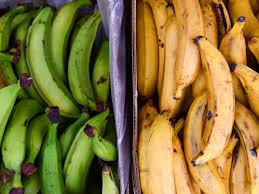

# **Comprehensive EDA and Evaluation of Bnana Quaity Dataset**
---
### Author : Zeeshan Ahmed


# **Want to connect ?**
---
[Linkedin](https://www.linkedin.com/in/zeeshanahmed2015/)\
[kaggle](https://www.kaggle.com/ziishan)

# **Objective**
----
The primary objective of this notebook is to conduct evaluation of various classification machine learning models to identify the most accurate algorithm for predicting the target variable. The evaluation will culminate with the application of the best-performing model on a set of dummy data to demonstrate its predictive capabilities.

# **Goals**
----
- To compare a range of machine learning algorithms..
- To select the top-performing model based on key performance metrics.
- To apply the chosen model to dummy data for prediction validation.

# **Algorithms Evaluated**
- Logistic Regression
- Support Vector Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- K-Nearest Neighbors Classifier
- XGBoost Classifier

<div style="border: 2px solid #708090; padding: 10px; max-width: 1500px;">
    <h3 style="color:#708090; font-weight:bold;">ABOUT THE AUTHOR</h3>
    <p>
        I am <b>Zeeshan Amed</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I am also a Power BI Analyst. As learning has no end so i am following that curve continously.
    </p>
    <div style="text-align: center;">
        <img src="https://media.licdn.com/dms/image/D5635AQGnVvKu4SKUmw/profile-framedphoto-shrink_400_400/0/1717940015867?e=1718546400&v=beta&t=aoRPO9_WRQ3G0ZM-Zw2n0hH-CiADnd5nH15PvPRHZ20" alt="Profile Picture" style="width: 200px; height: 200px; border-radius: 50%; border: 2px solid #D35400;"><br>
    </div>
    <p>
        You can find more about me on my <a href="https://github.com/ZeeshanAhmed92" target="_blank">GitHub</a> and <a href="https://www.linkedin.com/in/zeeshanahmed2015/" target="_blank">LinkedIn</a>.<br>
        Feel free to connect and reach out for any collaboration or queries!

# **Importing Libraries** 📚

This Dataset has been taken from kaggle.
Here i have imported all the required libraries which i will be using during my entire code.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# **Heading Function**
---

In [30]:
def heading(title):
    print("-"*150)
    print(title.upper())
    print("-"*150)

# **Summary Statistics**
---

Just have a quick look at the summary statistics of all numerical variables like min, max, count, mean, std, percentiles.

In [31]:
heading("summary statistics")
data = pd.read_csv('banana_quality.csv')
data.describe().T

------------------------------------------------------------------------------------------------------------------------------------------------------
SUMMARY STATISTICS
------------------------------------------------------------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Size,8000.0,-0.747802,2.136023,-7.998074,-2.277651,-0.897514,0.654216,7.970800
Weight,8000.0,-0.761019,2.015934,-8.283002,-2.223574,-0.868659,0.775491,5.679692
Sweetness,8000.0,-0.770224,1.948455,-6.434022,-2.107329,-1.020673,0.311048,7.539374
Softness,8000.0,-0.014441,2.065216,-6.959320,-1.590458,0.202644,1.547120,8.241555
HarvestTime,8000.0,-0.751288,1.996661,-7.570008,-2.120659,-0.934192,0.507326,6.293280
Ripeness,8000.0,0.781098,2.114289,-7.423155,-0.574226,0.964952,2.261650,7.249034
Acidity,8000.0,0.008725,2.293467,-8.226977,-1.629450,0.098735,1.682063,7.411633


In [32]:
heading("Dataset information")
data.info()

------------------------------------------------------------------------------------------------------------------------------------------------------
DATASET INFORMATION
------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [33]:
heading("Null values in columns")
data.isna().sum()

------------------------------------------------------------------------------------------------------------------------------------------------------
NULL VALUES IN COLUMNS
------------------------------------------------------------------------------------------------------------------------------------------------------


Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [34]:
heading("Numerical and Categorical columns")
numerical = data.select_dtypes(include=['float']).shape[1]
categorical = data.select_dtypes(include=['object']).shape[1]
print(f"• Numerical Columns : {numerical}")
print(f"• Categorical Columns : {categorical}")

------------------------------------------------------------------------------------------------------------------------------------------------------
NUMERICAL AND CATEGORICAL COLUMNS
------------------------------------------------------------------------------------------------------------------------------------------------------
• Numerical Columns : 7
• Categorical Columns : 1


In [35]:
heading("dataframe shape")
shape = data.shape
print(f"• Rows : {shape[0]}")
print(f"• Columns : {shape[1]}")

------------------------------------------------------------------------------------------------------------------------------------------------------
DATAFRAME SHAPE
------------------------------------------------------------------------------------------------------------------------------------------------------
• Rows : 8000
• Columns : 8


# **Data Normality Checking**
---

------------------------------------------------------------------------------------------------------------------------------------------------------
DISTRIBUTION OF NUMERICAL COLUMNS
------------------------------------------------------------------------------------------------------------------------------------------------------


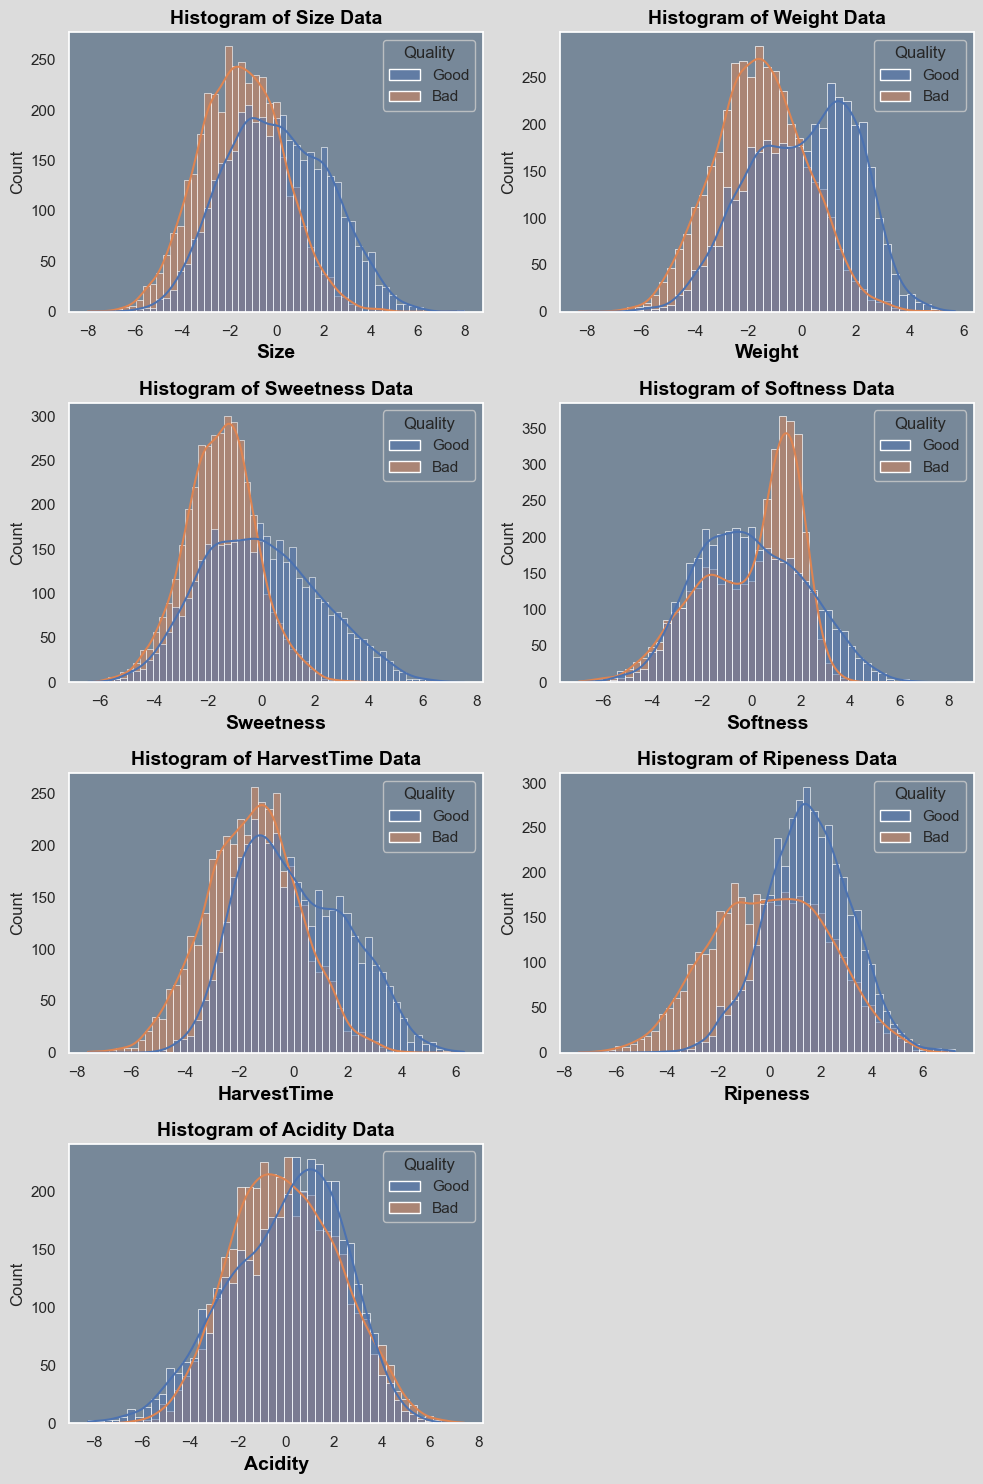

In [59]:
heading("Distribution of numerical columns")
sns.set_theme(rc={'axes.facecolor':'#778899','figure.facecolor':'#DCDCDC'})
plt.figure(figsize=(10,15))

for i, cols in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 2, i)
    sns.histplot(x=data[cols], kde=True, hue=data['Quality'])
    plt.title(f'Histogram of {cols} Data', fontsize=14,fontweight='bold',color='black')
    plt.xlabel(data.columns[i-1], fontsize=14,fontweight='bold',color='black')
    plt.grid(False)
plt.tight_layout()

# **Skewness of Each Feature**
---
- After checking the distribution of features we can see that there is a some skewness in them. Let see the amount of skewness and plot it.

------------------------------------------------------------------------------------------------------------------------------------------------------
SKEWNESS OF FEATURES
------------------------------------------------------------------------------------------------------------------------------------------------------
              Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
skewness  0.266737  0.044505   0.614313 -0.192981     0.278252 -0.312194   

           Acidity  
skewness -0.153031  


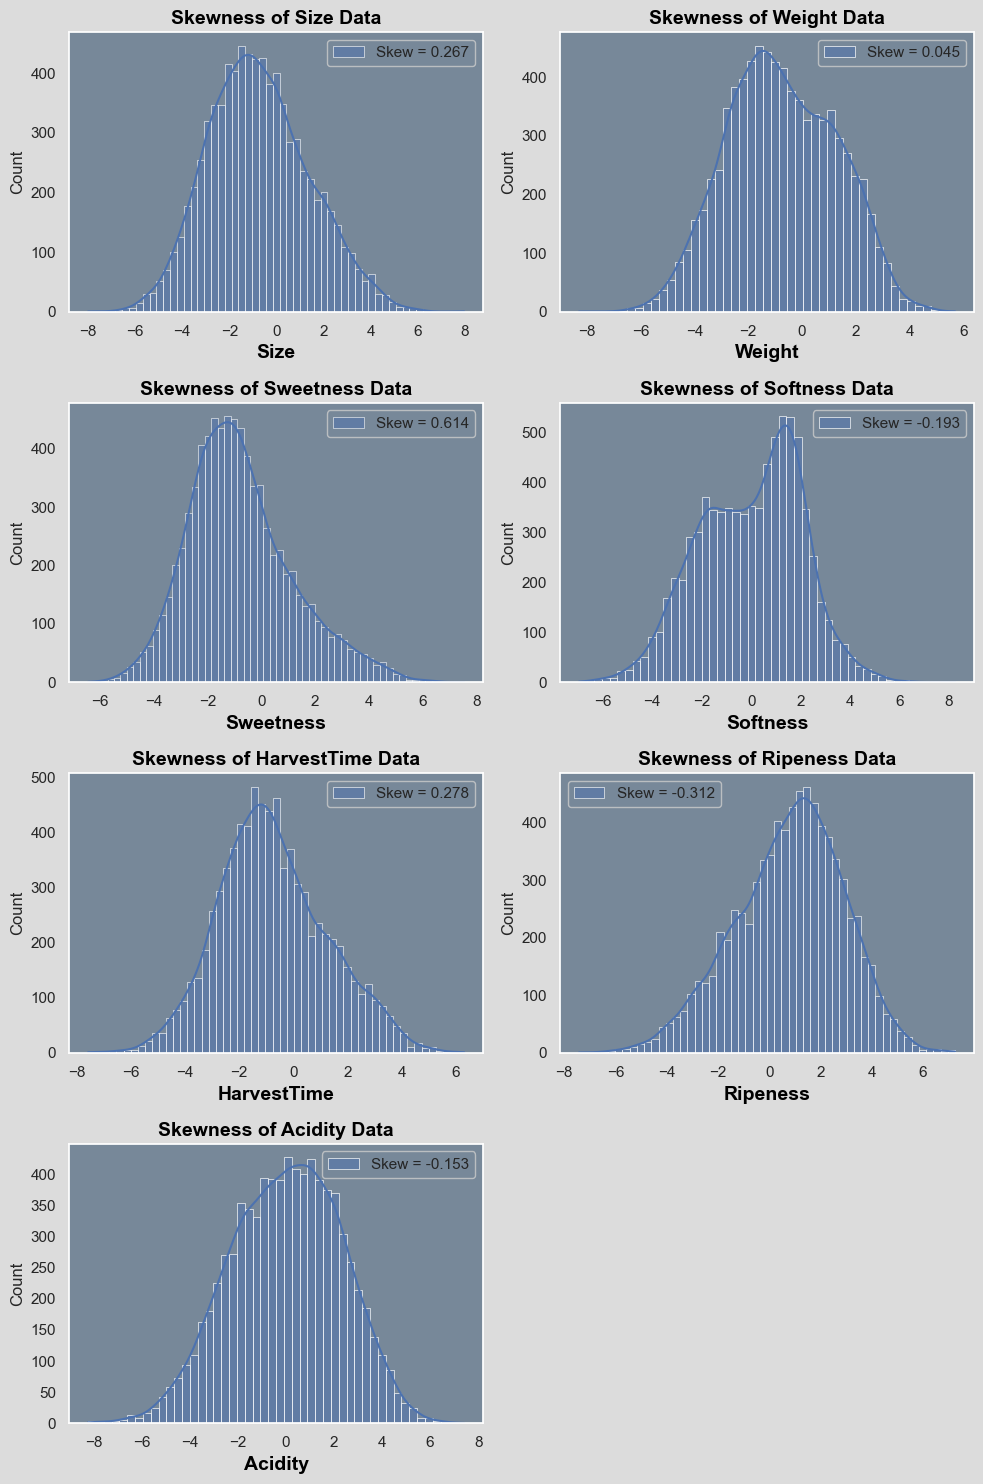

In [84]:
heading("Skewness of Features")
sns.set_theme(rc={'axes.facecolor':'#778899','figure.facecolor':'#DCDCDC'})
plt.figure(figsize=(10,15))

skewness = data[data.select_dtypes(exclude='object').columns.tolist()].skew()
df = pd.DataFrame([skewness], index=['skewness'])
print(df)

for i, cols in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 2, i)
    skewness = data[cols].skew()
    sns.histplot(x=data[cols], kde=True, label = "Skew = %.3f" %(skewness))
    plt.title(f'Skewness of {cols} Data', fontsize=14,fontweight='bold',color='black')
    plt.xlabel(data.columns[i-1], fontsize=14,fontweight='bold',color='black')
    plt.legend()
    plt.grid(False)
    
plt.tight_layout()


C:\Users\Hp\AppData\Local\Temp\ipykernel_9604\3861468498.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0.5, 1.0, 'Quality Distribution')

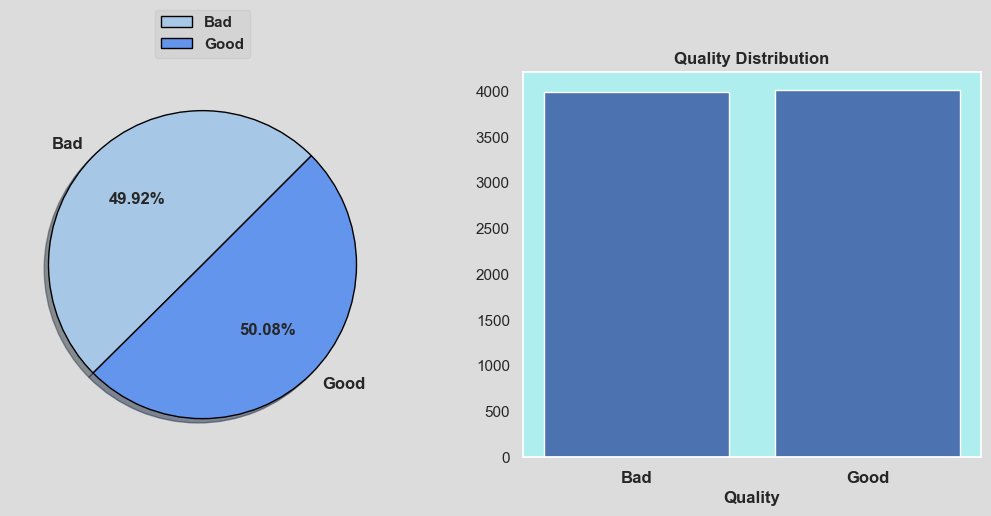

In [299]:
df =  data.groupby('Quality').size()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (13,5))
ax1.pie(df.values, labels=df.index, colors=['#A7C7E7','#6495ED'], startangle=45, autopct='%1.2f%%', shadow=True, wedgeprops={'edgecolor':'black'}, textprops={'fontsize':12,'fontweight':'bold'})
ax1.legend(loc='center', bbox_to_anchor=(0.5,1.1), fontsize=9, facecolor='lightgrey', prop={'weight':'bold'})

ax2.bar(df.index, df.values)
ax2.set_xlabel("Quality", weight='bold', fontsize=12)
ax2.set_xticklabels(labels=['Bad', 'Good'], weight='bold', fontsize=12)
plt.grid(False)
plt.title("Quality Distribution", weight='bold', fontsize=12)

# **Separating Features and Target Variables**
---
- One hot Encoding of categorical column which is target variable here and the splitting data into training and test sets.

In [92]:
le = LabelEncoder()
data['Quality'] = le.fit_transform(data['Quality'])
data['Quality'].unique()
X = data.drop('Quality', axis=1).values
y = data['Quality'].values


# **Correlation**
---
In this section, we will explore the correlation between each feature and the target variable.

<Axes: >

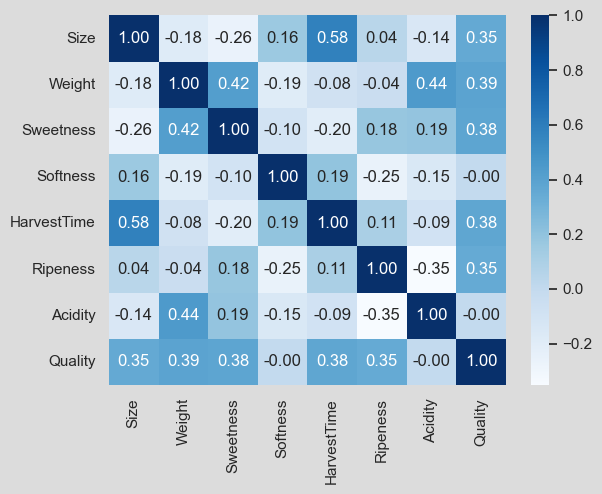

In [103]:
correlation_map = data.corr()
correlation_map['Quality'].sort_values(ascending=False)
sns.heatmap(correlation_map, cbar=True, annot=True, cmap='Blues', fmt='.2f')

We have seen that ``Size``, ``Weight``, ``Acidity``, ``Sweetness`` and ``HarvestTime`` have positive correlation among themselves, Since these are numerical features so se wac have a scatterplot between them. 

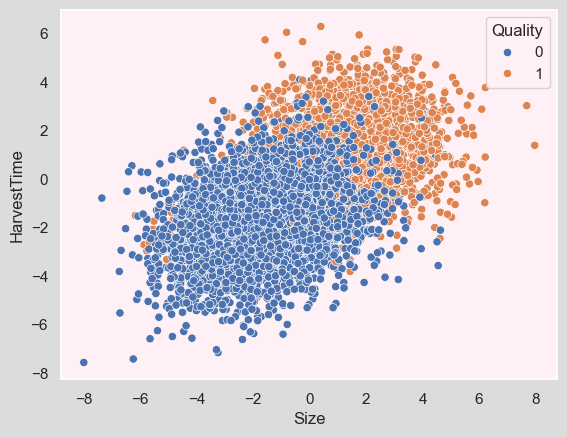

In [112]:
sns.set_theme(rc={'axes.facecolor':'#FFF0F5','figure.facecolor':'#DCDCDC'})
sns.scatterplot(x = data["Size"], y = data["HarvestTime"], hue = data["Quality"])
plt.grid(False)

<Axes: xlabel='Weight', ylabel='Acidity'>

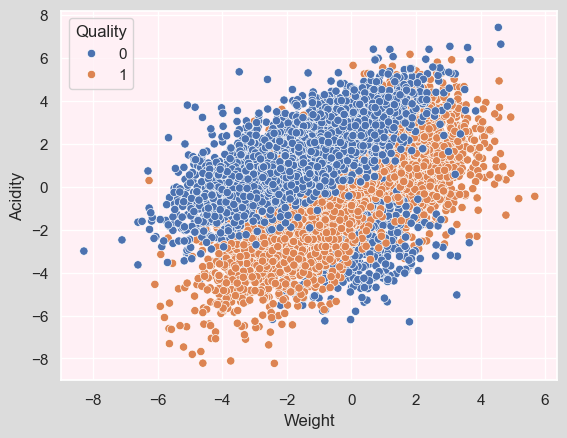

In [111]:
sns.scatterplot(x = data["Weight"], y = data["Acidity"], hue = data["Quality"])

<Axes: xlabel='Weight', ylabel='Sweetness'>

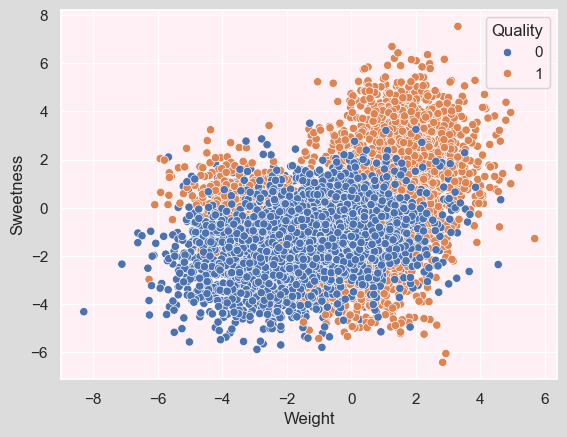

In [113]:
sns.scatterplot(x = data["Weight"], y = data["Sweetness"], hue = data["Quality"])

# **Splitting Data into Training amd Test Sets**
---

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# **Instantiating Classification Models**
---
Evaluation of CV_Scores for all models then taking mean CV Score and displaying on bars.

------------------------------------------------------------------------------------------------------------------------------------------------------
SORTED CV_SCORES
------------------------------------------------------------------------------------------------------------------------------------------------------
                        Model  CV_Score
0                         SVC  0.980938
1        KNeighborsClassifier  0.977656
2               XGBClassifier  0.971562
3      RandomForestClassifier  0.968906
4  GradientBoostingClassifier  0.956250
5      DecisionTreeClassifier  0.930937
6          LogisticRegression  0.878281
------------------------------------------------------------------------------------------------------------------------------------------------------
BARPLOT OF CSV_SCORES
------------------------------------------------------------------------------------------------------------------------------------------------------


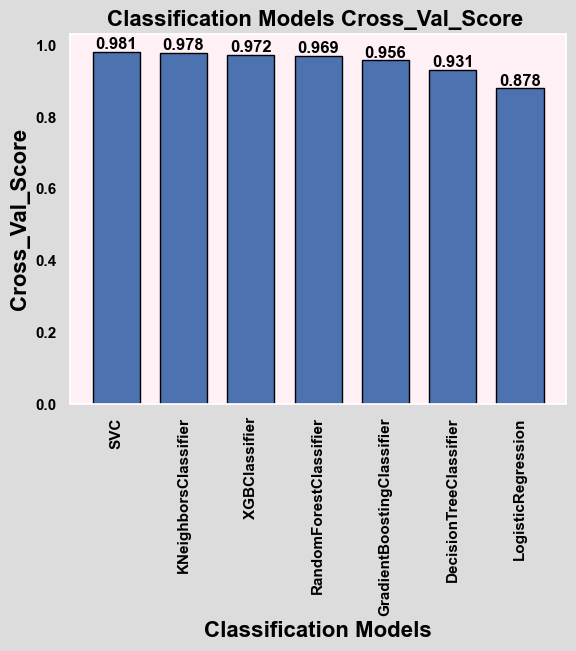

In [115]:
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC(), XGBClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
names = ['LogisticRegression','KNeighborsClassifier', 'DecisionTreeClassifier','SVC', 'XGBClassifier', 'RandomForestClassifier','GradientBoostingClassifier']   
results=[]       
for name, model in zip(names, models):
    kf=KFold(n_splits=4, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    average_results = cv_results.mean()
    results.append([name, average_results])
    
sorted_models = sorted(results, key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sorted_models, columns=['Model', 'CV_Score'])
heading('Sorted CV_Scores')
print(df)
heading('Barplot of CSV_Scores')

bars = plt.bar(df['Model'], df['CV_Score'], width=0.7, edgecolor='black') 

for bar, frequency in zip(bars,round(df['CV_Score'],3)):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), frequency,ha='center',va='bottom',fontsize=12, fontweight='bold', color='black')       

plt.xlabel("Classification Models", fontsize=16,fontweight='bold',color='black')
plt.ylabel("Cross_Val_Score", fontsize=16,fontweight='bold',color='black')
plt.xticks(rotation=90,color='black',weight='bold')
plt.yticks(color='black',weight='bold')
plt.title("Classification Models Cross_Val_Score ", fontsize=16,fontweight='bold',color='black')
plt.grid(False)


# **Evaluating Different Models Hyperparameters**
---

In [116]:
heading('Models Tunes Parameters')
models = {'LogReg':LogisticRegression(), 'KNN':KNeighborsClassifier(), 'DTC': DecisionTreeClassifier(), 'SVM' :SVC(), 'XGBoost':XGBClassifier(use_label_encoder=False), 'RandomForest':RandomForestClassifier(), 'GradientBoosting': GradientBoostingClassifier()}

param_grids = {'LogReg' : {'C': [0.1,1,10,100], 'solver':['lbfgs','liblinear'], 'penalty':['l2']},
                'KNN'   : {'n_neighbors': [3, 5, 7, 9], 'weights':['uniform','distance'], 'metric':['euclidean', 'manhattan']},
                'DTC'   : {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'criterion':['gini', 'entropy', 'log_loss']},
                'SVM'   : {'kernel': ['poly', 'rbf'], 'gamma':[1, 0.1, 0.01, 0.001], 'C': [0.1, 0.4, 0.1]},
                'XGBoost' : {'max_depth': [3,5,7],'n_estimators':[50, 60, 70], 'subsample':[0.6, 0.8, 1], 'learning_rate':[0.01, 0.1, 0.2]},
                'RandomForest' :{'n_estimators':[10, 20, 30, 40], 'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10]},
                'GradientBoosting' : {'n_estimators':[10, 20, 30], 'learning_rate':[0.01, 0.1, 0.2], 'max_depth': [3,5,7]}}
scores=[]  
              
for model_name, classifier in models.items():
    pipeline = Pipeline([('Transformer', QuantileTransformer()),(model_name, models[model_name])])
    rcv = RandomizedSearchCV(estimator=models[model_name], param_distributions=param_grids[model_name], cv=3, scoring='accuracy', verbose=1, n_jobs=-1, n_iter=1)
    rcv.fit(X_train,y_train)
    y_pred = rcv.predict(X_test)
    print(f'{models[model_name]} best parameters are :{rcv.best_params_} ')
    scores.append({ 'Model_Name' : model_name,
                   'Accuracy' : accuracy_score(y_test, y_pred),
                   'Precision' : precision_score(y_test, y_pred),
                   'Recall' : recall_score(y_test, y_pred),
                   'F1' : f1_score(y_test, y_pred)})

------------------------------------------------------------------------------------------------------------------------------------------------------
MODELS TUNES PARAMETERS
------------------------------------------------------------------------------------------------------------------------------------------------------
Fitting 3 folds for each of 1 candidates, totalling 3 fits
LogisticRegression() best parameters are :{'solver': 'lbfgs', 'penalty': 'l2', 'C': 10} 
Fitting 3 folds for each of 1 candidates, totalling 3 fits
KNeighborsClassifier() best parameters are :{'weights': 'uniform', 'n_neighbors': 9, 'metric': 'manhattan'} 
Fitting 3 folds for each of 1 candidates, totalling 3 fits
DecisionTreeClassifier() best parameters are :{'min_samples_split': 2, 'max_depth': 40, 'criterion': 'log_loss'} 
Fitting 3 folds for each of 1 candidates, totalling 3 fits
SVC() best parameters are :{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1} 
Fitting 3 folds for each of 1 candidates, totalling 3 f

# **Sorting Scores of Classifiers into DataFrame**
---

In [118]:
heading('Classification models scores')
sorted_classifers = sorted(scores, key=lambda x:x['Model_Name'], reverse=False)
DF = pd.DataFrame(sorted_classifers)
print(DF)

------------------------------------------------------------------------------------------------------------------------------------------------------
CLASSIFICATION MODELS SCORES
------------------------------------------------------------------------------------------------------------------------------------------------------
         Model_Name  Accuracy  Precision    Recall        F1
0               DTC  0.940000   0.937122  0.946276  0.941677
1  GradientBoosting  0.935000   0.942999  0.929182  0.936039
2               KNN  0.979375   0.980440  0.979243  0.979841
3            LogReg  0.879375   0.877108  0.888889  0.882959
4      RandomForest  0.969375   0.970660  0.969475  0.970067
5               SVM  0.958125   0.963054  0.954823  0.958921
6           XGBoost  0.933750   0.942857  0.926740  0.934729


In [119]:
best_model = max(sorted_classifers, key=lambda x:x['Accuracy'])
best_model

for key, value in best_model.items():
    print(f'{key} : {best_model[key]}')
    

Model_Name : KNN
Accuracy : 0.979375
Precision : 0.980440097799511
Recall : 0.9792429792429792
F1 : 0.9798411728772145


# **Line Plot of Train and Test Scores**
---

------------------------------------------------------------------------------------------------------------------------------------------------------
TRAIN AND TEST SCORES COMPARISON
------------------------------------------------------------------------------------------------------------------------------------------------------


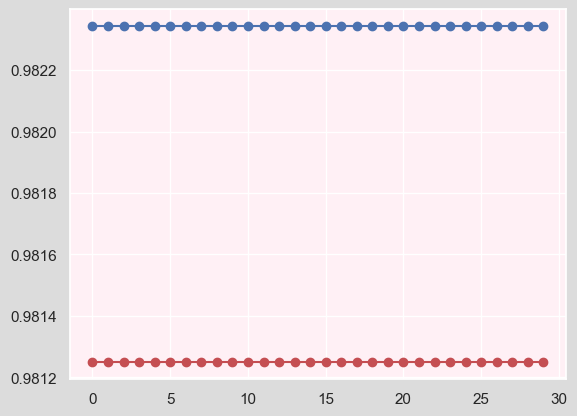

In [130]:
heading('Train and Test Scores Comparison')
Train_Scores=[]
Test_Scores=[]
for i in range(0,30,1):
    svc = SVC(kernel='rbf', C=0.1, gamma=0.1)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    Train_Scores.append(svc.score(X_train, y_train))
    Test_Scores.append(svc.score(X_test, y_test))
plt.plot(Train_Scores, marker='o', linestyle='-', color='b')
plt.plot(Test_Scores, marker='o', linestyle='-', color='r')

# **Confusion Matrix and Heat Map**
---

------------------------------------------------------------------------------------------------------------------------------------------------------
CONFUSION MATRIX
------------------------------------------------------------------------------------------------------------------------------------------------------
[[765  16]
 [ 14 805]]


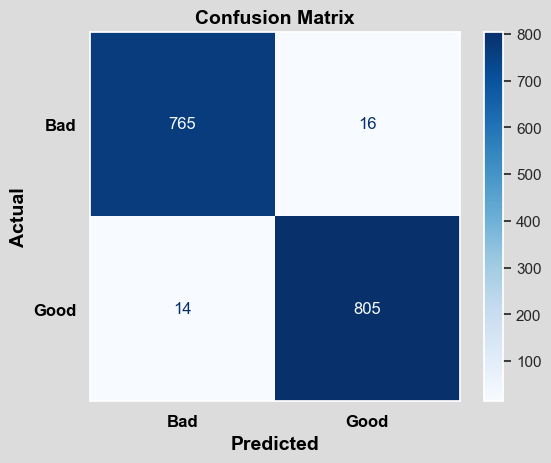

In [120]:
heading('Confusion Matrix')
svc = SVC(kernel='rbf', C=0.1, gamma=0.1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig, ax = plt.subplots()
dis = ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)

plt.xlabel('Predicted', fontsize=14,fontweight='bold',color='black')
plt.ylabel('Actual', fontsize=14,fontweight='bold',color='black')
plt.yticks([0,1],['Bad','Good'])
plt.xticks([0,1],['Bad','Good'])
plt.xticks(fontsize=12,fontweight='bold',color='black')
plt.yticks(fontsize=12,fontweight='bold',color='black')
plt.title("Confusion Matrix", fontsize=14,fontweight='bold',color='black')
ax.grid(False)